In [2]:
import pandas as pd
#import all dependencies 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
# create the raw dataframe from the CSV
raw_data = pd.read_csv("raw-2005-2019 (4).csv")
regions = pd.read_csv("Country divided by regions(world Bank).csv")

# Drop unsused columns and rename needed columns for region
regions = regions[["Region", "TableName"]]
regions = regions.rename(columns={"TableName" : "Country name"})

# Create the the dataframe being used for the gini index comparison 
gini_index = pd.merge(raw_data.dropna(), regions)
gini_index_2010 = gini_index.loc[gini_index["year"] == 2010]
gini_index_2015 = gini_index.loc[gini_index["year"] == 2015]

#Create main clean data without the GINI index
clean_data = raw_data.drop("GINI index (World Bank estimate)", 1)

#Get data for the 3 most recent years
clean_data = clean_data.loc[clean_data["year"] >= 2017]


merged_data = pd.merge(clean_data, regions, on = "Country name")

#### Add the countries that were left out 

In [4]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})

# Create an empty list to store the values that are not found in the regions list
not_in_list = []

# Create a list for
regions_list = regions["Country name"].tolist()

for index, row in clean_data.iterrows():
      if row["Country name"] not in regions_list:
            not_in_list.append(row["Country name"])
# Drop the duplicates to see the countries excluded from the merge due to country name issues
not_in_list = list(dict.fromkeys(not_in_list))

#After i had the unique countries that did not get merged i checked the CSV file to see why.
#If it was in the CSV file but with a different name i updated the name in the CSV file to match our dataframe
#If the country was not in the CSV file i added the data by adding its name and appropriate region that matches the CSV (Laos and Palestinian Territories)

#Print len of list that contains valued not merged to make sure that no conutries from clean data set were left out and that they all received a region
print(len(not_in_list))

#print the len of your merged data and orginal dataframe to make sure they match just for good measures and all orginal data is represented
print(len(merged_renamed), len(clean_data))

0
0 0


In [5]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})

In [6]:
merged_renamed.loc[merged_renamed["Country Name"] == "United States"]

,year,Happiness Score,GDP per Capita(ln),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Actual GDP Value,Log GDP per capita.1,Region,Country Name


#### Filter data set to only include countries that have data for all 3 years

In [7]:
#Get a working copy of the merged data to work with
loop_df = pd.DataFrame.copy(merged_renamed)
# loop_df = loop_df.loc[0:10]
#Set global variables
count = 0
country = ""
countries = []

# Create a for loop to get the countries that have data for all 3 years (2017 - 2019)
for index, row in loop_df.iterrows():
    if country != row["Country Name"]:
        country = row["Country Name"]
        count = 0
    elif country == row["Country Name"]:
        count += 1
        if count == 2:
            countries.append( row["Country Name"])

# Print the lenght of the countries with all 3 years and original data frame to see how many we are losing
print(len(countries))
print(len(loop_df["Country Name"].unique()))

#Get the new Dataframe that countries countries that have data for all 3 years
Final_df = loop_df.set_index("Country Name").loc[countries].reset_index()

#Check to see if lenght matches length of countries lists
Final_df["Country Name"].nunique()


0
0


0

#### Final Data sets

In [8]:
#Gini Data set 
gini_index
gini_index_2010
gini_index_2015



,year,Life Ladder,Log GDP per capita,GINI index (World Bank estimate),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Actual GDP Value,Log GDP per capita.1,Region,Country name


# GINI,GDP and Happiness

In [9]:
#See the descriptive statistics 
gini_index_2010.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate)
count,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,2010.0,5.950958,9.724583,0.861334,66.642857,0.713877,0.000377,0.764555,0.724362,0.231355,0.391032,1.940533,0.338320,0.361270
std,0.0,1.026825,0.833115,0.099328,4.642848,0.147167,0.188005,0.192947,0.117236,0.798604,0.925530,0.301559,0.089404,0.082326
min,2010.0,3.912276,7.594235,0.540389,50.500000,0.364206,-0.302790,0.174896,0.473150,-1.737298,-1.002261,1.336110,0.178103,0.248000
25%,2010.0,5.112523,9.215052,0.815769,64.450001,0.582011,-0.139956,0.693536,0.637658,-0.441997,-0.459970,1.751516,0.274466,0.301500
50%,2010.0,5.866131,9.795860,0.889153,66.800003,0.730258,-0.049502,0.819940,0.736898,0.352862,0.183388,1.941183,0.328852,0.337000
75%,2010.0,6.800145,10.410388,0.927166,70.850002,0.831868,0.096876,0.913748,0.829442,0.949773,1.088513,2.080593,0.390914,0.398500
max,2010.0,7.770515,11.426749,0.974977,72.900002,0.943631,0.532877,0.983276,0.901268,1.518027,2.058373,3.222718,0.680613,0.634000


In [10]:
# regimen_group = clean_data.groupby('Drug Regimen')
# count_mice_per_drug= regimen_group['Mouse ID'].count()


# #Generate Scatter plot and linear regression in 2010 
# fig,ax = plt.subplots(figsize=(12,6))
# x_values = pd.to_numeric(gini_index_2010['Life Ladder']).astype(float)
# y_values = pd.to_numeric(gini_index_2010['GINI index (World Bank estimate)']).astype(float)
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
# #plt.annotate(line_eq,(6,10),fontsize=12,color="red")
# plt.xlabel("Life Ladder")
# plt.ylabel("GINI Index")
# plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# # #print the statistical values to see the relationship between the two variables
# # correlation = st.pearsonr(x_values,y_values)
# # print(f"The correlation coefficient is {round(correlation[0],2)}")
# print(f"Regression line equation is: {line_eq}")
# print(f"The r-squared is: {rvalue**2}")

# plt.show()


In [11]:
#Data set with the countries that have data for all 3 years 
Final_df

,Country Name,year,Happiness Score,GDP per Capita(ln),Social Support,HALE,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
0,Afghanistan,2017,2.661718,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393,0.496349,-1.896539,-1.440218,1.454051,0.546283,South Asia
1,Afghanistan,2018,2.694303,7.458603,0.507516,52.599998,0.373536,-0.082319,0.927606,0.424125,-1.870725,-1.438761,1.408344,0.522712,South Asia
2,Afghanistan,2019,2.375092,7.458469,0.419973,52.400002,0.393656,-0.096549,0.923849,0.351387,NaN,NaN,1.412905,0.594884,South Asia
3,Albania,2017,4.639548,9.376133,0.637698,68.400002,0.749611,-0.029357,0.876135,0.669241,0.290326,-0.128311,2.682105,0.578096,Europe & Central Asia
4,Albania,2018,5.004403,9.417863,0.683592,68.699997,0.824212,0.008337,0.899129,0.713300,0.294235,-0.129403,2.640531,0.527642,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Zambia,2018,4.041488,8.228971,0.717720,55.299999,0.790626,0.037525,0.810731,0.702698,-0.089234,-0.500724,2.783419,0.688711,Sub-Saharan Africa
383,Zambia,2019,3.306797,8.224403,0.637894,55.799999,0.811040,0.066340,0.831956,0.743407,NaN,NaN,2.860172,0.864937,Sub-Saharan Africa
384,Zimbabwe,2017,3.638300,7.851042,0.754147,55.000000,0.752826,-0.091540,0.751208,0.806428,-0.952548,-1.350873,2.656848,0.730244,Sub-Saharan Africa
385,Zimbabwe,2018,3.616480,7.896704,0.775388,55.599998,0.762675,-0.063282,0.844209,0.710119,-0.920905,-1.323000,2.498696,0.690919,Sub-Saharan Africa


# Understanding log GDP: log GDP is not simply a growth rate of GDP!!!

log GDP is the absolute value that converted from the actual number.
log formula = ln x = log e^x

Reasons why we're using log GDP instead of actual number. Long story to short: 
1. To make outliers not look like outliers (to make "bad" data to be well behaved). Though it's far from the median/mean values, it makes it easier to read.  
2. To simplify the numbers and their complexity of interaction terms. A logarithm makes all data to be positive which would make it easier to draw a graph and linearize a relationship 

# Anlyasis 1) The Relationship between log GDP and Happiness

### 2010

Regression line equation is: y = 0.79x + -1.74
The r-squared is: 0.4117974248212296


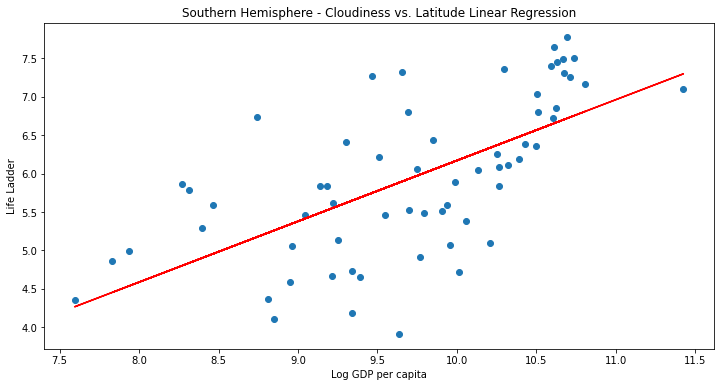

In [13]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2010['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2010['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()



### 2015 

Regression line equation is: y = 0.8x + -2.0
The r-squared is: 0.5805338096308975


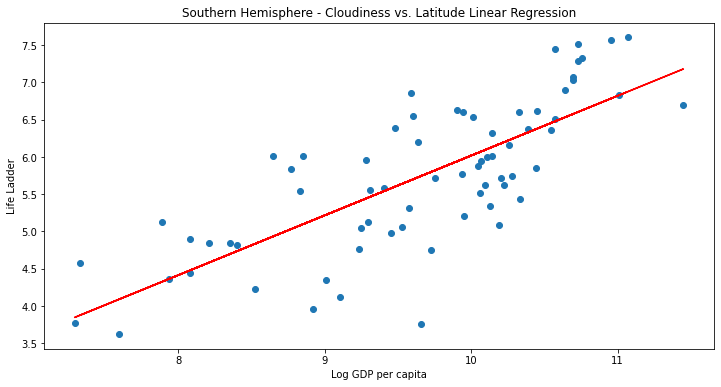

In [14]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2015['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2015['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

# Analysis 2) The Relationship between GINI Indx and Happiness

### 2010

Regression line equation is: y = -0.58x + 6.16
The r-squared is: 0.002187511654227114


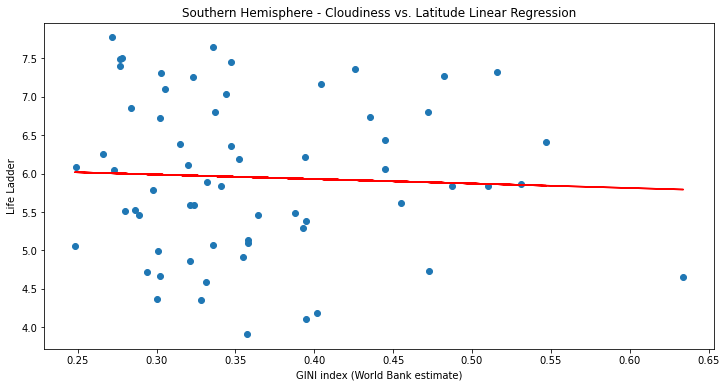

In [15]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2010['GINI index (World Bank estimate)']).astype(float)
y_values = pd.to_numeric(gini_index_2010['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI index (World Bank estimate)")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()


### 2015

Regression line equation is: y = -3.72x + 7.11
The r-squared is: 0.08508987931370365


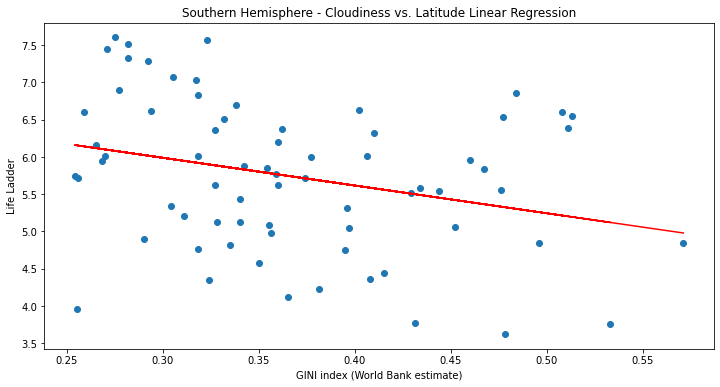

In [16]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2015['GINI index (World Bank estimate)']).astype(float)
y_values = pd.to_numeric(gini_index_2015['Life Ladder']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI index (World Bank estimate)")
plt.ylabel("Life Ladder")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()


# Analysis 3) The Relationship between GINI Index and GDP

### 2010 

Regression line equation is: y = -0.03x + 0.62
The r-squared is: 0.07324954560194219


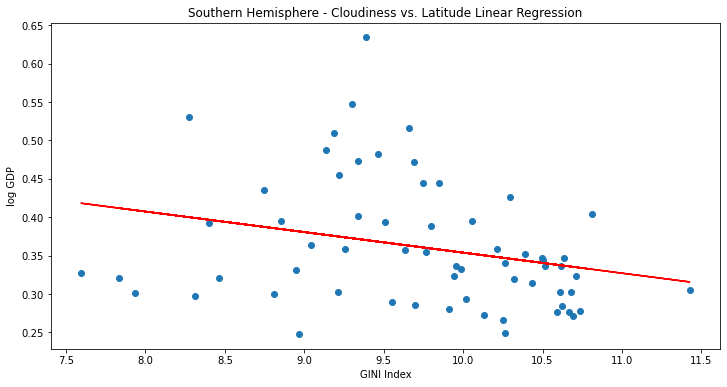

In [17]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2010['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2010['GINI index (World Bank estimate)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI Index")
plt.ylabel("log GDP")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

### 2015 

Regression line equation is: y = -0.03x + 0.69
The r-squared is: 0.16560724063031973


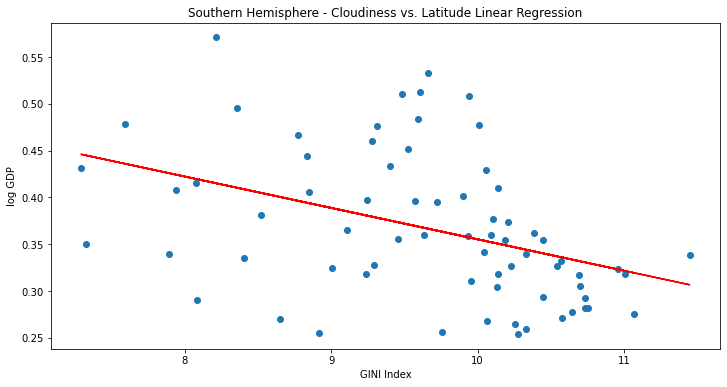

In [18]:
#Generate a scatter plot and linear regression
fig,ax = plt.subplots(figsize=(12,6))
x_values = pd.to_numeric(gini_index_2015['Log GDP per capita']).astype(float)
y_values = pd.to_numeric(gini_index_2015['GINI index (World Bank estimate)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " +str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
ax.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.65), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=15,color="red")
#plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel("GINI Index")
plt.ylabel("log GDP")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# #print the statistical values to see the relationship between the two variables
# correlation = st.pearsonr(x_values,y_values)
# print(f"The correlation coefficient is {round(correlation[0],2)}")
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [19]:
# x_values = pd.to_numeric(merged_gini_df['Life Ladder']).astype(float)
# y_values = pd.to_numeric(merged_gini_df['Growth Rate']).astype(float)

# Anaylysis 4) Each group's relationship with Happiness 

Grouped into 4 then see the difference. 

group1) low GINI & low log GDP - 4.8/

group2) low GINI & high log GDP - 6.5/

group3) high GINI & low log GDP - 4.7 /

group4) high GINI & high log GDP - 5.7 

group 2 has shown the highest happiness score while group 1 and 3 show similar score. 
This data would indicate that how much you earn is more relevant to your happiness than the degree of economic inequality. 

- Draw a bar/scatter plots to visualize this data. 

In [1]:
#Divde into 4 groups to see the relationship with happiness/ used 'mean' values for both indicators
group_1 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_2 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]< 0.338) & (gini_index_2015["Log GDP per capita"] >= 9.27), :]
group_3 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] < 9.27), :]
group_4 = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]> 0.338) & (gini_index_2015["Log GDP per capita"] > 9.27), :]


NameError: name 'gini_index_2015' is not defined

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
35,Austria,2015,7.076447,10.697696,0.928110,72.099998,0.900305,0.102583,0.557480,0.798263,1.263306,1.564229,1.762817,0.249110,0.305,Europe & Central Asia
46,Belarus,2015,5.718908,9.753776,0.924073,65.199997,0.622753,-0.095122,0.668678,0.583727,-0.677531,-0.650102,2.004021,0.350420,0.256,Europe & Central Asia
56,Belgium,2015,6.904219,10.641150,0.885209,71.400002,0.869475,0.064905,0.468785,0.805178,0.987267,1.440750,1.511811,0.218969,0.277,Europe & Central Asia
130,Croatia,2015,5.205438,9.953512,0.768363,68.400002,0.693523,-0.094134,0.848546,0.608886,0.573118,0.330863,1.785050,0.342920,0.311,Europe & Central Asia
145,Czech Republic,2015,6.608017,10.328933,0.911363,68.800003,0.808484,-0.142858,0.886467,0.750774,1.010975,0.931798,1.802234,0.272734,0.259,Europe & Central Asia
154,Denmark,2015,7.514425,10.731777,0.959701,71.500000,0.941436,0.223100,0.191016,0.829217,1.225238,1.958987,1.618308,0.215360,0.282,Europe & Central Asia
201,Estonia,2015,5.628909,10.225942,0.917930,68.000000,0.814692,-0.163718,0.568734,0.723338,0.903892,1.340644,1.893060,0.336310,0.327,Europe & Central Asia
210,Finland,2015,7.447926,10.573466,0.947801,71.599998,0.929862,0.112200,0.223370,0.751316,1.292087,1.996956,1.573618,0.211283,0.271,Europe & Central Asia
219,France,2015,6.357625,10.541011,0.895719,73.199997,0.817036,-0.138424,0.640602,0.785966,0.656673,1.321365,1.847276,0.290561,0.327,Europe & Central Asia
238,Germany,2015,7.037138,10.692925,0.925923,71.300003,0.889429,0.178984,0.412168,0.764539,1.060911,1.773198,1.648845,0.234306,0.317,Europe & Central Asia


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
67,Bolivia,2015,5.834329,8.770963,0.828706,62.700001,0.883625,-0.021084,0.862374,0.785768,-0.136578,-0.843813,1.857556,0.318384,0.467,Latin America & Caribbean
190,El Salvador,2015,6.018496,8.850637,0.790755,65.199997,0.733356,-0.152128,0.804544,0.825734,0.067696,-0.262001,2.579119,0.428532,0.406,Latin America & Caribbean
202,Ethiopia,2015,4.573155,7.325462,0.625597,57.000000,0.802643,0.119070,0.567027,0.713888,-1.398272,-0.659277,1.865662,0.407960,0.350,Sub-Saharan Africa
230,Georgia,2015,4.121941,9.105573,0.517372,65.099998,0.639945,-0.188097,0.502417,0.547280,-0.095747,0.569531,2.048507,0.496976,0.365,Europe & Central Asia
262,Honduras,2015,4.845437,8.354058,0.772376,66.599998,0.534058,-0.087559,0.848083,0.862837,-0.445333,-0.677459,3.067590,0.633088,0.496,Latin America & Caribbean
287,Indonesia,2015,5.042800,9.245594,0.809478,61.500000,0.779418,0.462385,0.945967,0.876233,-0.215101,-0.334661,2.067515,0.409993,0.397,East Asia & Pacific
318,Ivory Coast,2015,4.445039,8.078747,0.703992,47.700001,0.799745,-0.036908,0.744250,0.663882,-0.619915,-0.563580,2.208616,0.496872,0.415,Sub-Saharan Africa
332,Kenya,2015,4.357618,7.936611,0.776923,58.299999,0.792990,0.237204,0.852550,0.702257,-0.695204,-0.528827,2.104910,0.483041,0.408,Sub-Saharan Africa
428,Myanmar,2015,4.223846,8.523228,0.752064,58.099998,0.807971,0.669303,0.633305,0.865906,-1.192024,-1.133447,1.620931,0.383757,0.381,East Asia & Pacific


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
72,Botswana,2015,3.761965,9.658858,0.815656,56.799999,0.857169,-0.119637,0.860293,0.746204,0.741217,0.597275,2.291609,0.609152,0.533,Sub-Saharan Africa
79,Brazil,2015,6.546897,9.602870,0.906693,65.800003,0.798935,-0.022317,0.771339,0.755194,0.063697,-0.230077,2.257859,0.344875,0.513,Latin America & Caribbean
98,Chile,2015,6.532750,10.010426,0.827142,69.599998,0.768881,0.036379,0.811511,0.803025,0.718964,1.263847,1.938147,0.296682,0.477,Latin America & Caribbean
107,Colombia,2015,6.387572,9.481480,0.889900,66.800003,0.790898,-0.102062,0.842899,0.839295,-0.532610,-0.034323,2.246151,0.351644,0.511,Latin America & Caribbean
121,Costa Rica,2015,6.854004,9.589951,0.878273,70.699997,0.906926,-0.052060,0.761419,0.849710,0.916802,0.538637,2.263607,0.330260,0.484,Latin America & Caribbean
138,Cyprus,2015,5.439161,10.331148,0.769556,73.099998,0.628035,0.113012,0.892795,0.746730,0.791225,1.039575,2.402444,0.441694,0.340,Europe & Central Asia
164,Dominican Republic,2015,5.061862,9.526418,0.893198,64.900002,0.856025,-0.065321,0.755288,0.713908,0.195487,-0.431556,2.927932,0.578430,0.452,Latin America & Caribbean
175,Ecuador,2015,5.964075,9.278399,0.855889,67.599998,0.800870,-0.113916,0.665828,0.850546,-0.177855,-0.824964,2.470919,0.414301,0.460,Latin America & Caribbean
248,Greece,2015,5.622519,10.091405,0.834825,71.800003,0.531736,-0.268624,0.823960,0.739751,0.210646,0.214054,2.209591,0.392990,0.360,Europe & Central Asia
292,Iran,2015,4.749956,9.722172,0.572407,65.099998,0.780383,0.148760,0.698951,0.644849,-1.219647,-0.762139,2.522234,0.531002,0.395,Middle East & North Africa


In [24]:
print(group_1['Life Ladder'].mean())
print(group_2['Life Ladder'].mean())
print(group_3['Life Ladder'].mean())
print(group_4['Life Ladder'].mean())

4.803574005666667
6.511840661416667
4.740749359214286
5.78066240830769
